In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step

In [3]:
len(train_data)

8982

In [4]:
train_data.shape

(8982,)

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

### Clean Data

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [15]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [55]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [41]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Create validation data

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Do the things

In [45]:
history = model.fit(
        partial_x_train, 
        partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val)
         )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 249us/step - loss: 2.7153 - acc: 0.4696 - val_loss: 1.8189 - val_acc: 0.6180

### Plot things

In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

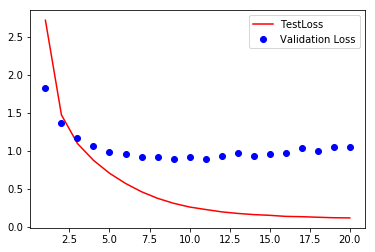

In [54]:
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'r', label='TestLoss')
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')

plt.legend()

plt.show()

In [57]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 174us/step


[1.1870444398423123, 0.7845057880676759]